In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filtered_df = pd.read_parquet("../.data/processed/filtered_user_features.parquet")

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Liste des variables retenues
features = [
    "count_view", "count_cart", "count_purchase",
    "unique_sessions", "active_days", "recency_days",
    "total_spent", "avg_purchase_price"
]

# Filtrage des utilisateurs actifs déjà effectué dans filtered_df
X = filtered_df[features].copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7841232 entries, 0 to 7841231
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   count_view          int64  
 1   count_cart          int64  
 2   count_purchase      int64  
 3   unique_sessions     int64  
 4   active_days         int64  
 5   recency_days        int64  
 6   total_spent         float64
 7   avg_purchase_price  float64
dtypes: float64(2), int64(6)
memory usage: 478.6 MB


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copie de X pour transformation
X_transformed = X.copy()

# Variables à transformer avec log(1 + x)
log_features = ["count_view", "count_cart",
                "count_purchase", "total_spent", "avg_purchase_price"]
X_transformed[log_features] = X_transformed[log_features].apply(
    lambda x: np.log1p(x))

# Standardisation finale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

INFO:Agglomerative_Clustering:Début du test Agglomerative Clustering avec différentes valeurs de k
INFO:Agglomerative_Clustering:Début du test Agglomerative Clustering avec k de 2 à 10 sur un échantillon plus petit
INFO:Agglomerative_Clustering:Test avec k = 2
INFO:Agglomerative_Clustering:Silhouette = 0.5251
INFO:Agglomerative_Clustering:Test avec k = 3
INFO:Agglomerative_Clustering:Silhouette = 0.4781
INFO:Agglomerative_Clustering:Test avec k = 4
INFO:Agglomerative_Clustering:Silhouette = 0.3271
INFO:Agglomerative_Clustering:Test avec k = 5
INFO:Agglomerative_Clustering:Silhouette = 0.3332
INFO:Agglomerative_Clustering:Test avec k = 6
INFO:Agglomerative_Clustering:Silhouette = 0.3313
INFO:Agglomerative_Clustering:Test avec k = 7
INFO:Agglomerative_Clustering:Silhouette = 0.3059
INFO:Agglomerative_Clustering:Test avec k = 8
INFO:Agglomerative_Clustering:Silhouette = 0.3126
INFO:Agglomerative_Clustering:Test avec k = 9
INFO:Agglomerative_Clustering:Silhouette = 0.2801
INFO:Agglomerativ

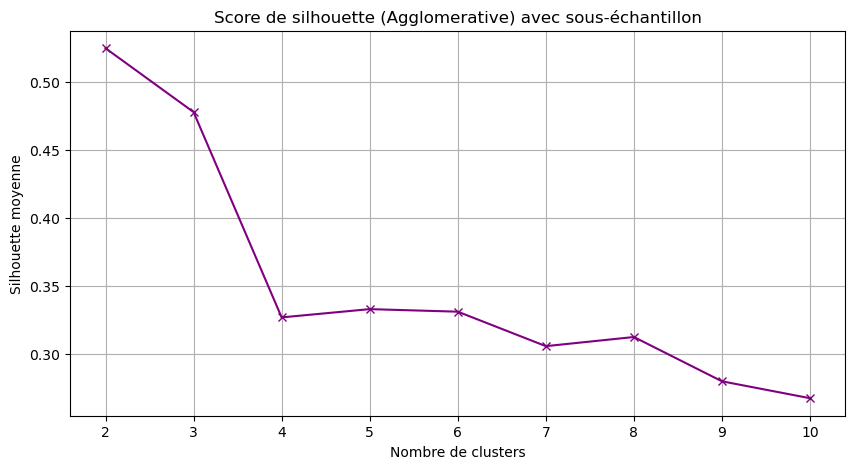

In [5]:
import logging
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("Agglomerative_Clustering")
logger.info(
    "Début du test Agglomerative Clustering avec différentes valeurs de k")

# Nouveau sous-échantillonnage
sample_size_agglom = 10000
X_agglom = X_scaled[np.random.choice(
    X_scaled.shape[0], sample_size_agglom, replace=False)]

logger.info(
    "Début du test Agglomerative Clustering avec k de 2 à 10 sur un échantillon plus petit")

k_range = range(2, 11)
silhouette_scores_agglom = []

for k in k_range:
    logger.info(f"Test avec k = {k}")
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X_agglom)

    score = silhouette_score(X_agglom, labels)
    silhouette_scores_agglom.append(score)
    logger.info(f"Silhouette = {score:.4f}")

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores_agglom, marker='x', color='purple')
plt.title("Score de silhouette (Agglomerative) avec sous-échantillon")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette moyenne")
plt.grid(True)
plt.show()